# Data 620 - Project 2
Week 4 Project 2 - Summer 2021
Author: Layla Quinones
Group Members: Maliat Islam, & Karim Hammoud

## Assignment
<ol>
    <li>Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.</li>
    <li>Reduce the size of the network using a What can you infer about each of the distinct groups?method such as the island method described in chapter 4 of social network analysis.</li>
    <li>What can you infer about each of the distinct groups?</li>
</ol>

## Introduction
- What data did we choose and why? Where did you get it from? How was it gathered? Describe how it fullfills the requirements - Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.

What are bipartite networks? Why are they important?
- nodes are divided into two sets
- nodes cannot connect to other nodes in its same set, it must connect only to a node in the other set



## Data Importing & Pre Processing
- source of data
- format of data
- description of data
- what does each node mean
- edges?

In [33]:
#Import libraries
import pandas as pd
import networkx as nx
import pylab as plt
import numpy as np

#import data into dataframe from github link
rawData = pd.read_csv("https://raw.githubusercontent.com/akarimhammoud/DATA-620/main/Week_4_project_2/IMDB-Movie-Data.csv", sep =',') 
rawData.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


Describe the data - how many observations, what information is there.

We are interested in creating a 2-Mode network with actors and movies as nodes.

In [34]:
#dataframe with movie and actors only
movieActorRaw = rawData[['Title','Actors']]
movieActorRaw.head()

,Title,Actors
0,Guardians of the Galaxy,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S..."
1,Prometheus,"Noomi Rapace, Logan Marshall-Green, Michael Fa..."
2,Split,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar..."
3,Sing,"Matthew McConaughey,Reese Witherspoon, Seth Ma..."
4,Suicide Squad,"Will Smith, Jared Leto, Margot Robbie, Viola D..."


In [35]:
#seperate the Actors column and Title column
actors = list(rawData.Actors)
movies = list(rawData.Title)

In [36]:
#split each element in actors into a list
for i in range(len(actors)):
    actors[i] = actors[i].split(',')

In [37]:
#create a dictionary with movies and actors
dictionary = dict(zip(movies, actors))

In [38]:
#create a edgelist out of the dictionary
#create a DF from dict
imdbDF = pd.DataFrame.from_dict(dictionary, orient = 'index')
#create new DF with dict keys as rows and values as columns
imdbDF = pd.DataFrame(list(zip(list(imdbDF.T.keys()), list(imdbDF[0]), list(imdbDF[1]), list(imdbDF[2]), list(imdbDF[3]))), columns = ['Title', 'One', 'Two', 'Three', 'Four'])
#Pivot from wide to long format (With titles repeating)
imdbDF = pd.melt(imdbDF, id_vars=['Title'], value_vars=['One', 'Two', 'Three', 'Four'])
imdbDF = imdbDF[['Title','value']]
imdbDF = imdbDF.rename(columns = {'value': 'Actor'})
imdbDF.head()

,Title,Actor
0,Guardians of the Galaxy,Chris Pratt
1,Prometheus,Noomi Rapace
2,Split,James McAvoy
3,Sing,Matthew McConaughey
4,Suicide Squad,Will Smith


## Network Creation

Since the data we are working with is split into two groups, we can generate a bipartite graph that can help us gather more insight about the relationships between actors based on the movies they have worked in. Below we generated a undirected network graph and a bipartite network graph, and took some general metrics to get a better sense of how to reduce or subset the data for more in depth analysis. We chose to add attributes of 'director' and 'year' to each movie node so that we can include as much information about the nodes as possible.

In [39]:
#generate a list with all unique actors 
uniqueActors = list(imdbDF.Actor.unique())
#generate a list of all unique movies
uniqueMovie = list(rawData.Title)
#generate a list of all directors (to add as attribute)
listOfDirectors = list(rawData['Director'])
#generate a list of all directors (to add as attribute)
listOfYears = list(rawData['Year'])
#list of rank
rank = list(rawData['Rank'])
#Turn edge list into tuple
records = imdbDF.to_records(index=False)
result = list(records)

In [40]:
#create undirected graph object
G = nx.Graph()

#add attributes to each movie node group 0
for i in range(len(rawData.Title)):
    G.add_node(uniqueMovie[i], director = listOfDirectors[i], year = listOfYears[i], bipartite = 0)

#add actor nodes group 1
G.add_nodes_from(uniqueActors, bipartite=1)

#add the edges to the graph
G.add_edges_from(result)

#display information to inspect
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 3392
Number of edges: 3996
Average degree:   2.3561


In [41]:
#check to see if attributes seem correct
list(dict(G.nodes.data()).items())[0:5]

[('Guardians of the Galaxy',
  {'director': 'James Gunn', 'year': 2014, 'bipartite': 0}),
 ('Prometheus', {'director': 'Ridley Scott', 'year': 2012, 'bipartite': 0}),
 ('Split', {'director': 'M. Night Shyamalan', 'year': 2016, 'bipartite': 0}),
 ('Sing', {'director': 'Christophe Lourdelet', 'year': 2016, 'bipartite': 0}),
 ('Suicide Squad', {'director': 'David Ayer', 'year': 2016, 'bipartite': 0})]

In [42]:
# Inspect to see if bipartite
nx.is_bipartite(G)

True

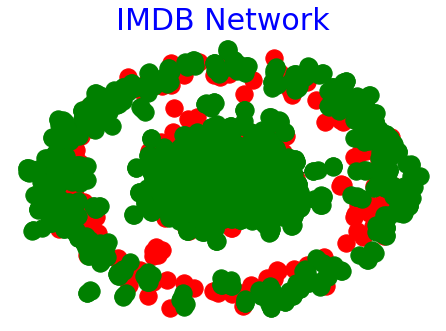

In [43]:
#visualize
nx.draw(G, nodelist = uniqueMovie, node_color = 'r')
nx.draw(G, nodelist = uniqueActors, node_color = 'g')
plt.title('IMDB Network', fontsize = 30, color = 'blue')
plt.show()

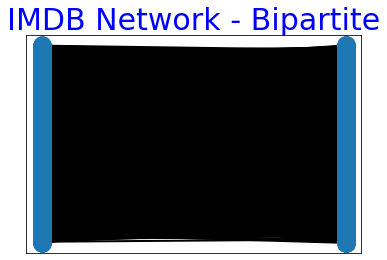

In [44]:
# draw the graph using the bipartite layout to show connections
nx.draw_networkx(G, pos = nx.drawing.layout.bipartite_layout(G, uniqueMovie), width = 2, with_labels = False)
plt.title('IMDB Network - Bipartite', fontsize = 30, color = 'blue')
plt.show()

In [45]:
#check if the network is fully connected 
nx.is_connected(G)

False

In [46]:
#access the number of connected components
nx.number_connected_components(G)

141

In [47]:
#calculate the network density
nx.density(G)

0.000694819249623031

## Analysis
As we can see from the above outpus, our IMDB 2-mode has 3392 nodes and 3996 edges which makes it appear fairly saturated and therefore few insights can be extracted. In the first graph we color coded node types: red dots indicates the movies and green indicates the actors. The average degree centrality of this network is 2.3561 which indicates that the any node in the network is a little over two nodes away from any other node. We can also see that the graph of the network is not fully connected and therefore we cannot determine other metric such as diameter. We do see however that there are 141 fully connected subnetworks that are included in the network. We can also see that our network has a low network density which indicates that there are more potential connections between nodes than actual connections. Applying some network reduction techniques can help us gain some more in-depth understanding between nodes, clusters and cliques.

## Network Reduction: Island Method

- in order to use island method we must add weights to each edge connection. in order to do this we calculated the degree centrality for each actor - this will help incorperate the "stregth" of each actor in our network so that we can implement the island method
- what is the island method?
- why are we using it?
- Describe what you are doing (subsetting) how and why.

(array([1673.,  708.,  414.,  360.,  330.,  296.,    0.,  112.,   81.,
          22.]),
 array([0.0002949 , 0.0005898 , 0.00088469, 0.00117959, 0.00147449,
        0.00176939, 0.00206429, 0.00235919, 0.00265408, 0.00294898,
        0.00324388]),
 <BarContainer object of 10 artists>)

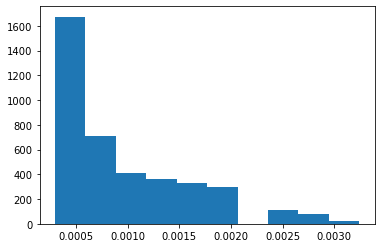

In [48]:
# calculate the degree centrality for each node in the network
d = nx.degree_centrality(G)
#sort them with actor names (tuples)
centralitySorted = sorted(d.items(), key = lambda item: item[1], reverse = True)
#organize the tuples into a dictionary
centDict = {k: v for k, v in centralitySorted}
#organize into a list
centList = list(centDict.items())
#create a list that stores the degree centrality for each edge that 
#matches the edge list (specifically number of connections per actor)
weightList = []
for i in range(len(centList)):
    for j in range(len(result)):
        if result[j][1] == centList[i][0]:
            weightList.append(centList[i][1])

#visualize the weights 
plt.hist(weightList)

#We can see here that there are a majority of connections with low weights
# and a few with very high weights. We will using this information when deciding
# the water levels used in the island method below

In [49]:
#create undirected graph object
G2 = nx.Graph()

#add attributes to each movie node group 0
for i in range(len(rawData.Title)):
    G2.add_node(uniqueMovie[i], director = listOfDirectors[i], year = listOfYears[i], bipartite = 0)

#add actor nodes group 1
G2.add_nodes_from(uniqueActors, bipartite=1)

#add the edges to the graph with weights
for i in range(len(result)):
    G2.add_edge(result[i][0], result[i][1], weight = weightList[i])

#display information to inspect
print(nx.info(G2))

Name: 
Type: Graph
Number of nodes: 3392
Number of edges: 3996
Average degree:   2.3561


In [50]:
# create an edge view object to display connections
edges = G2.edges()
edges.data()

EdgeDataView([('Guardians of the Galaxy', 'Chris Pratt', {'weight': 0.0032438808611029196}), ('Guardians of the Galaxy', ' Vin Diesel', {'weight': 0.0011795930404010617}), ('Guardians of the Galaxy', ' Bradley Cooper', {'weight': 0.0005897965202005308}), ('Guardians of the Galaxy', ' Zoe Saldana', {'weight': 0.0002948982601002654}), ('Prometheus', 'Noomi Rapace', {'weight': 0.0032438808611029196}), ('Prometheus', ' Logan Marshall-Green', {'weight': 0.0011795930404010617}), ('Prometheus', ' Michael Fassbender', {'weight': 0.0005897965202005308}), ('Prometheus', ' Charlize Theron', {'weight': 0.0002948982601002654}), ('Split', 'James McAvoy', {'weight': 0.0032438808611029196}), ('Split', ' Anya Taylor-Joy', {'weight': 0.0011795930404010617}), ('Split', ' Haley Lu Richardson', {'weight': 0.0005897965202005308}), ('Split', ' Jessica Sula', {'weight': 0.0002948982601002654}), ('Sing', 'Matthew McConaughey', {'weight': 0.0032438808611029196}), ('Sing', 'Reese Witherspoon', {'weight': 0.00117

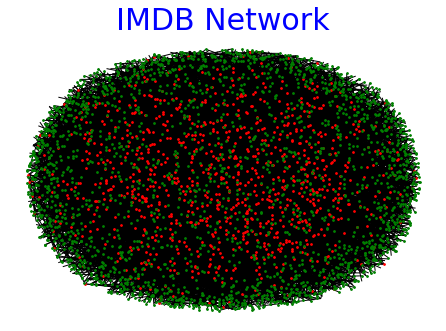

In [51]:
#visualize to see any differences
#visualize
nx.draw(G2, nodelist = uniqueMovie, node_color = 'r', node_size = 3)
nx.draw(G2, nodelist = uniqueActors, node_color = 'g', node_size = 3)
plt.title('IMDB Network', fontsize = 30, color = 'blue')
plt.show()

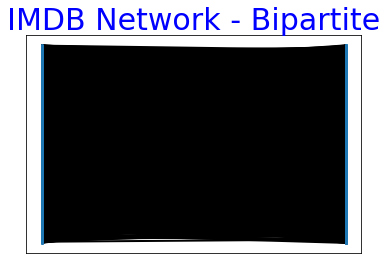

In [52]:
# draw the graph using the bipartite layout to show connections
nx.draw_networkx(G2, node_size = 3, pos = nx.drawing.layout.bipartite_layout(G2, uniqueMovie), width = 2, with_labels = False)
plt.title('IMDB Network - Bipartite', fontsize = 30, color = 'blue')
plt.show()

(array([140.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([   5. ,  266.5,  528. ,  789.5, 1051. , 1312.5, 1574. , 1835.5,
        2097. , 2358.5, 2620. ]),
 <BarContainer object of 10 artists>)

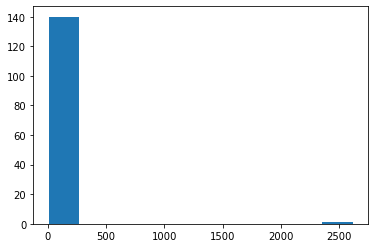

In [53]:
#plot the distribution of components
x=[len(c) for c in nx.connected_components(G2)]
plt.hist(x)

#we can see here that most of the subgraphs (140) of them have about 5 connections
# and we also see that there is one giant one with 2620 connections - we can treat this as one giant network
#***Taken from CH 4
#we can incorperate the weights we specified above to help isolate these sialnds via the island method

In [54]:
#island method
def trim_edges(g, weight = 0.00176939):
    g2=nx.Graph()
    g3 = nx.Graph()
    edgeData = list(g.edges(data=True))
    for f, to, w in edgeData:
        if w['weight'] > weight:
            g2.add_edge(f,to,weight = w['weight'])
        else:
            g3.add_edge(f,to,weight = w['weight'])
    return g2,g3

#return the new network
G3, G4 = trim_edges(G2)

#extract the edge list from this graph in order to graph
#G3 is the edges
newEdgeListH = list(G3.edges(data = True))
newEdgeListL = list(G4.edges(data = True))

#create node lists and weight Lists
hMovies = []
hActors = []
hWeights = []
lMovies = []
lActors = []
lWeights = []
for i in range(len(newEdgeListH)):
    hMovies.append(newEdgeListH[i][0])
    hActors.append(newEdgeListH[i][1])
    hWeights.append(newEdgeListH[i][2]['weight'])
for i in range(len(newEdgeListL)):
    lMovies.append(newEdgeListL[i][0])
    lActors.append(newEdgeListL[i][1])
    lWeights.append(newEdgeListL[i][2]['weight'])

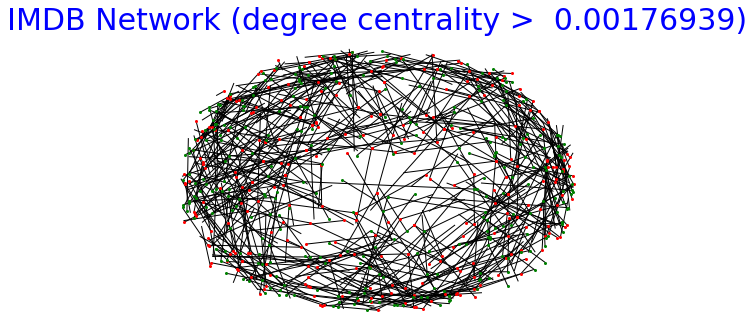

In [55]:
#graph the new network (high)
nx.draw(G3, nodelist = hMovies, node_color = 'r', node_size = 4)
nx.draw(G3, nodelist = hActors, node_color = 'g', node_size = 4)
plt.title('IMDB Network (degree centrality >  0.00176939)', fontsize = 30, color = 'blue')
plt.show()
#The weight chosen in the above algorithm was the midpoint of all our weights taken from
#the weight which were visualized above

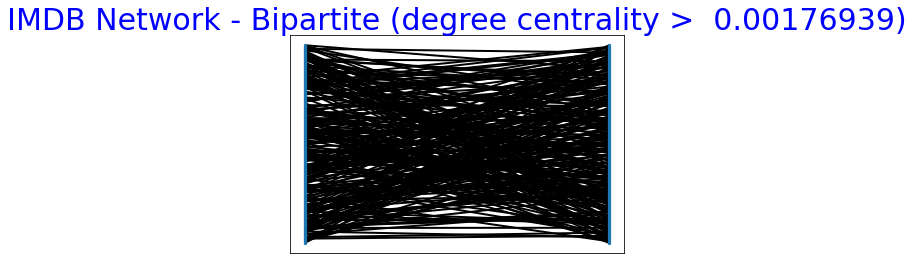

In [56]:
# draw the graph using the bipartite layout to show connections
nx.draw_networkx(G3, node_size = 5, pos = nx.drawing.layout.bipartite_layout(G3, hMovies), width = 2, with_labels = False)
plt.title('IMDB Network - Bipartite (degree centrality >  0.00176939)', fontsize = 30, color = 'blue')
plt.show()

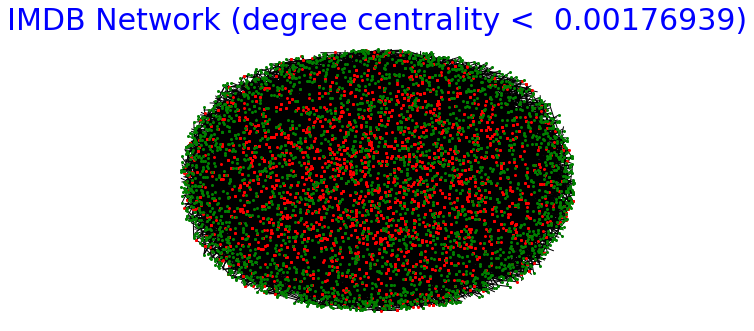

In [57]:
#graph the new network (low)
nx.draw(G4, nodelist = lMovies, node_color = 'r', node_size = 4)
nx.draw(G4, nodelist = lActors, node_color = 'g', node_size = 4)
plt.title('IMDB Network (degree centrality <  0.00176939)', fontsize = 30, color = 'blue')
plt.show()
#The weight chosen in the above algorithm was the midpoint of all our weights taken from
#the weight which were visualized above

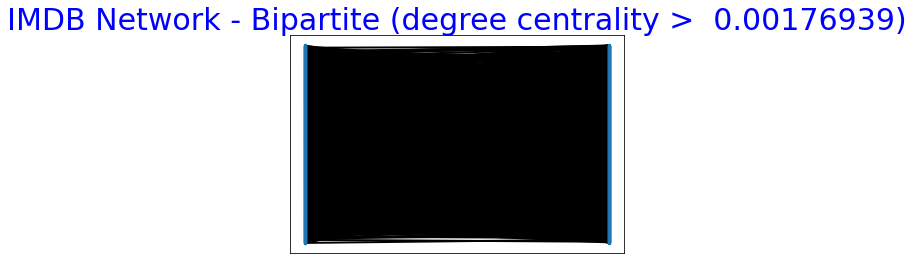

In [58]:
# draw the graph using the bipartite layout to show connections
nx.draw_networkx(G4, node_size = 5, pos = nx.drawing.layout.bipartite_layout(G4, lMovies), width = 2, with_labels = False)
plt.title('IMDB Network - Bipartite (degree centrality >  0.00176939)', fontsize = 30, color = 'blue')
plt.show()
## here it is easy to see that by using the island method we have reduced the network substacially leaving those edges
#with greater influence (weight) in G3 and most weaker influence (weight) in G4

In [59]:
#create a list of all the unique weights (based on the histogram of weights above there only should be)
#about 10
uniqueWeightList = np.array(weightList)
uniqueWeightList = np.unique(uniqueWeightList)
# We can also do this for various water levels so that we have a list of networks at each level
#since we have a discrete set of weights we can raise the water level by weight
#island method
#This will return a list of graph objects corresponding to a water level
#Each water level corresponds to the edge weights specified in uniqueWeightList
graphs = []
def island_method(g, weightList):
    #grab the edge data
    edgeData = list(g.edges(data=True))
    #generate 10 graph objects
    for i in range(len(uniqueWeightList)):
        graphs.append(nx.Graph())
    
    #check for weights in each category
    for f, to, w in edgeData:
        for i in range(len(weightList)):
            if w['weight'] == weightList[i]:
                graphs[i].add_edge(f,to,weight = w['weight'])
    return graphs

#create subgraphs of each component
S = [G2.subgraph(c).copy() for c in nx.connected_components(G2)]

#check to see if the first item in the list is the largest subgraph
#We can see that this subgraph has 2620 nodes which matches our histogram
#We'll apply the island method to the largest fully connected subgraph
print(nx.info(S[0]))

#apply the island method to largest subgraph
islandGraphs = island_method(S[0], uniqueWeightList)

Name: 
Type: Graph
Number of nodes: 2620
Number of edges: 3356
Average degree:   2.5618


(array([426.,  58.,  19.,  10.,   8.,   4.,   3.,   2.,   0.,   1.]),
 array([ 2. ,  4.2,  6.4,  8.6, 10.8, 13. , 15.2, 17.4, 19.6, 21.8, 24. ]),
 <BarContainer object of 10 artists>)

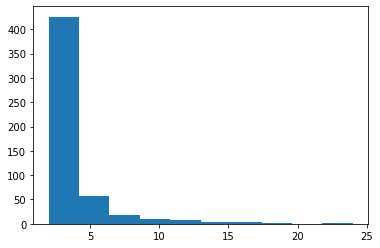

In [60]:
#plot the distribution of components
x=[len(c) for c in nx.connected_components(islandGraphs[0])]
plt.hist(x)

Name: 
Type: Graph
Number of nodes: 1924
Number of edges: 1396
Average degree:   1.4511
Name: 
Type: Graph
Number of nodes: 1032
Number of edges: 589
Average degree:   1.1415
Name: 
Type: Graph
Number of nodes: 638
Number of edges: 358
Average degree:   1.1223
Name: 
Type: Graph
Number of nodes: 553
Number of edges: 297
Average degree:   1.0741
Name: 
Type: Graph
Number of nodes: 470
Number of edges: 279
Average degree:   1.1872
Name: 
Type: Graph
Number of nodes: 291
Number of edges: 165
Average degree:   1.1340
Name: 
Type: Graph
Number of nodes: 162
Number of edges: 86
Average degree:   1.0617
Name: 
Type: Graph
Number of nodes: 180
Number of edges: 95
Average degree:   1.0556
Name: 
Type: Graph
Number of nodes: 126
Number of edges: 69
Average degree:   1.0952
Name: 
Type: Graph
Number of nodes: 42
Number of edges: 22
Average degree:   1.0476


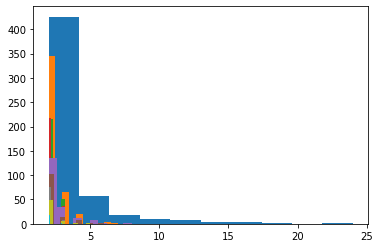

In [61]:
for i in range(len(islandGraphs)):
    #print the basic information about each subgraph
    print(nx.info(islandGraphs[i]))
    # plot the histogram for each component of each island
    x=[len(c) for c in nx.connected_components(islandGraphs[i])]
    plt.hist(x)

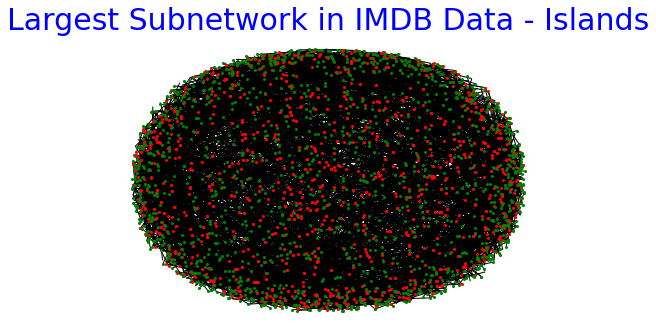

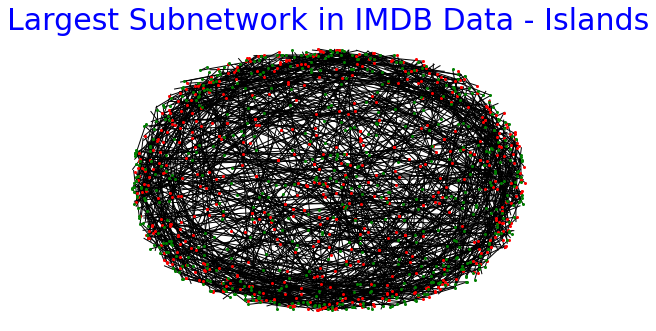

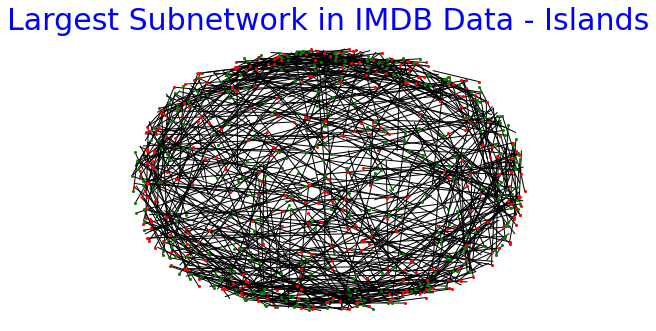

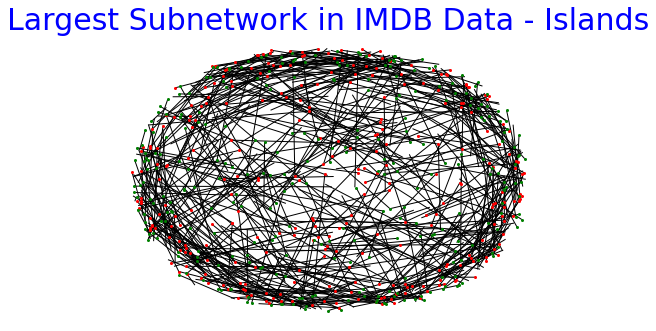

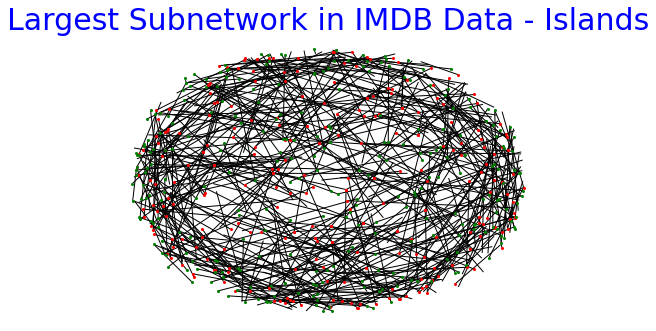

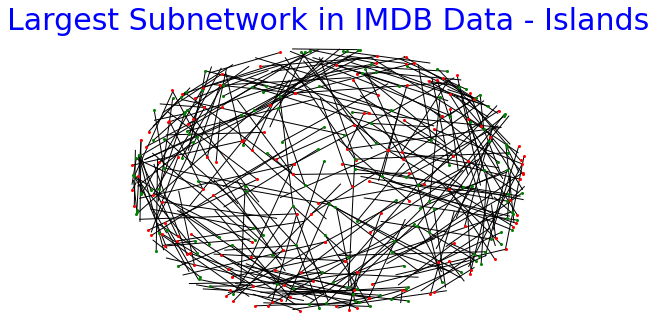

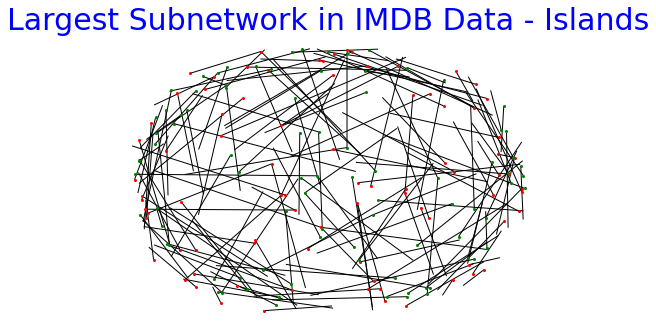

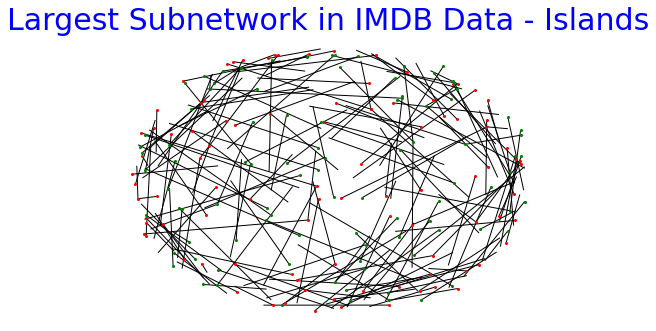

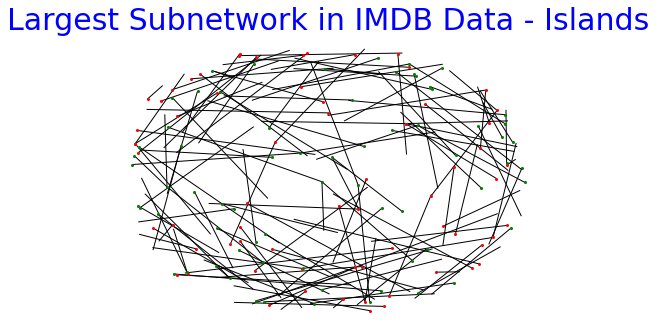

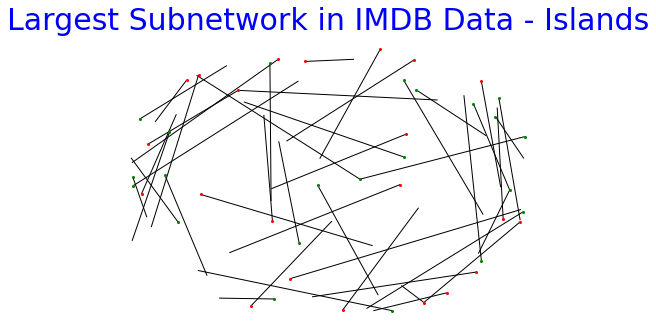

In [62]:
#plot the networks
for i in islandGraphs:
    edgeList = list(i.edges(data = True))
    movies = []
    actors = []
    for j in range(len(edgeList)):
        movies.append(edgeList[j][0])
        actors.append(edgeList[j][1])
        #weights.append(edgeList[i][2]['weight'])
    
    #graph the network
    nx.draw(i, nodelist = movies, node_color = 'r', node_size = 4)
    nx.draw(i, nodelist = actors, node_color = 'g', node_size = 4)
    plt.title('Largest Subnetwork in IMDB Data - Islands', fontsize = 30, color = 'blue')
    plt.show()
    

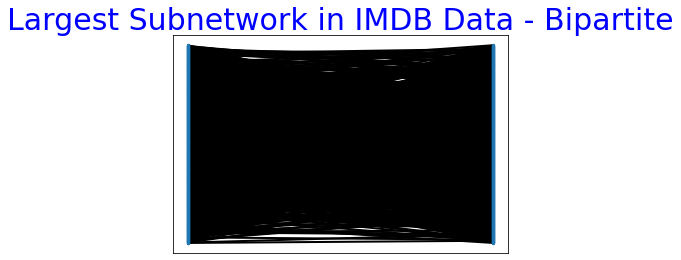

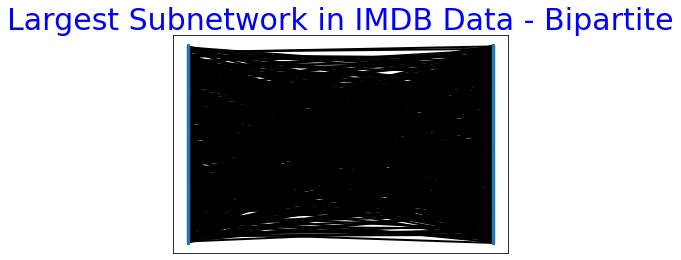

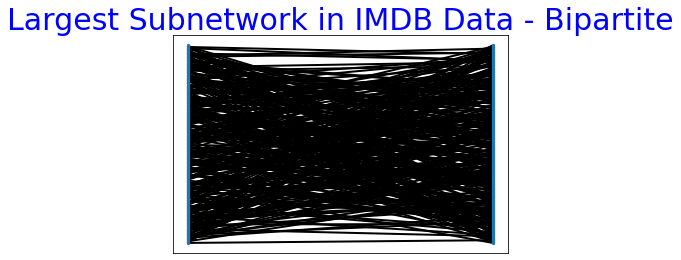

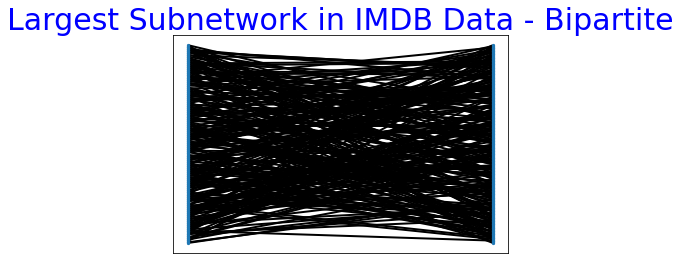

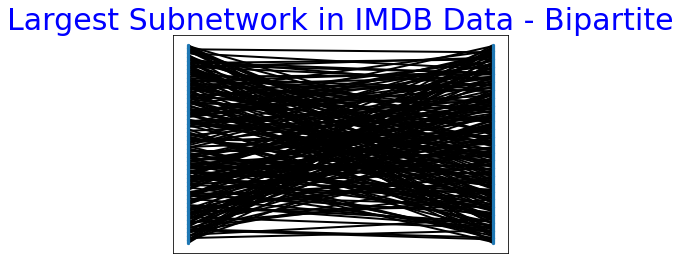

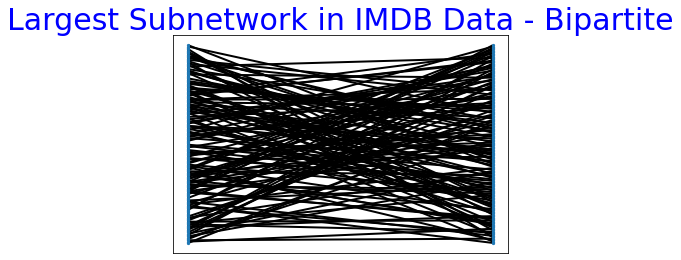

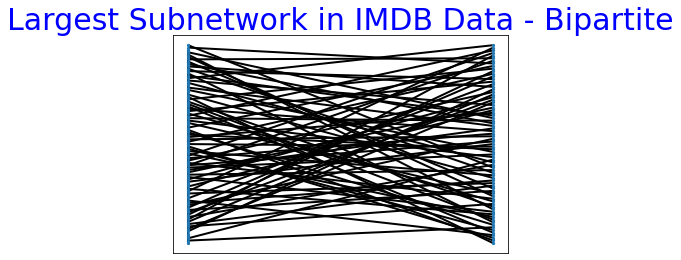

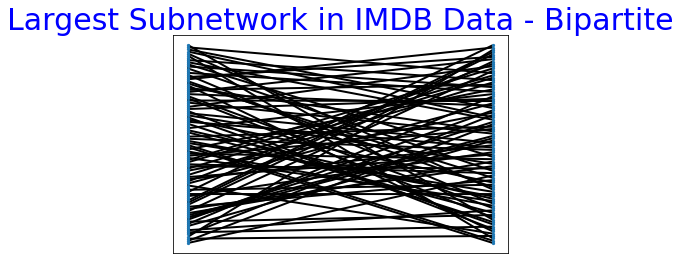

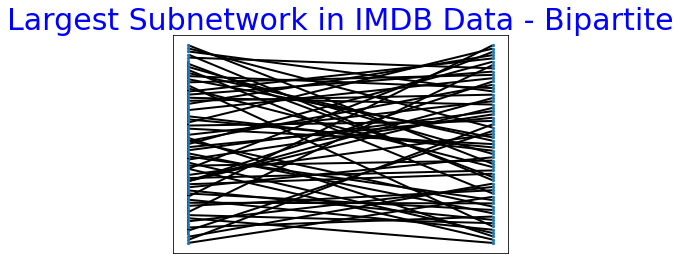

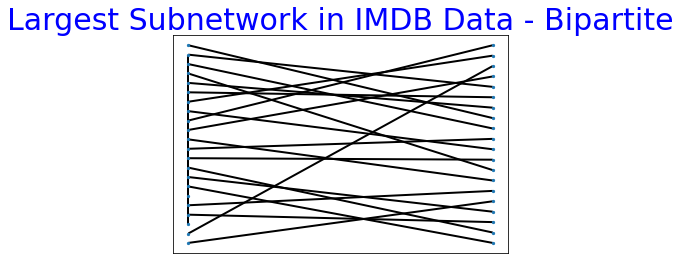

In [63]:
#plot the networks
for i in islandGraphs:
    edgeList = list(i.edges(data = True))
    movies = []
    actors = []
    for j in range(len(edgeList)):
        movies.append(edgeList[j][0])
        actors.append(edgeList[j][1])
        #weights.append(edgeList[i][2]['weight'])
    # draw the graph using the bipartite layout to show connections
    nx.draw_networkx(i, node_size = 5, pos = nx.drawing.layout.bipartite_layout(i, movies), width = 2, with_labels = False)
    plt.title('Largest Subnetwork in IMDB Data - Bipartite', fontsize = 30, color = 'blue')
    plt.show()

In [64]:
#create a list of  centrality measures for each island
degCent = []
betCent = []
closCent = []
eigenCent = []

#calculate the average of each measure fore each island
for i in range(len(islandGraphs)):
    degCent.append(pd.DataFrame.from_dict(nx.degree_centrality(islandGraphs[i]), orient='index')[0].mean())
    betCent.append(pd.DataFrame.from_dict(nx.betweenness_centrality(islandGraphs[i]), orient='index')[0].mean())
    closCent.append(pd.DataFrame.from_dict(nx.closeness_centrality(islandGraphs[i]), orient='index')[0].mean())
    eigenCent.append(pd.DataFrame.from_dict(nx.eigenvector_centrality(islandGraphs[i]), orient='index')[0].mean())

#place all average metrics in a datframe for comparison
islandDF = pd.DataFrame(list(zip(uniqueWeightList, degCent, betCent, closCent, eigenCent)), columns = ['Island Weight', 'Degree Centrality', 'Betweeness Centrality', 'Closenss Centrality', 'Eigenvector Centrality'])

In [65]:
islandDF

,Island Weight,Degree Centrality,Betweeness Centrality,Closenss Centrality,Eigenvector Centrality
0,0.000295,0.000755,2.141717e-06,0.001058,0.001866
1,0.000590,0.001107,3.978422e-07,0.001270,0.002378
2,0.000885,0.001762,7.273453e-07,0.001931,0.004712
3,0.001180,0.001946,5.113081e-07,0.002042,0.004948
4,0.001474,0.002531,2.733585e-06,0.003049,0.005492
5,0.001769,0.003910,4.838304e-06,0.004468,0.007875
6,0.002064,0.006595,5.271835e-06,0.006891,0.011932
7,0.002359,0.005897,3.835987e-06,0.006137,0.010740
8,0.002654,0.008762,1.740911e-05,0.009605,0.016846
9,0.003244,0.025552,5.807201e-05,0.026326,0.057486


### Inferences
Now that we have subnetworks (slices of our larger subnetwork) we can begin to compare and analyze each network and try to extract some insights. As seen in the above dataframe, degree centrality begins to increase as the weight category for our islands increase - we can tell that the island in the highest weight category (0.003244) holds actors with that are regarded as important players and hold a lot of influence in this movie network. Similarly, betweenness centrality increases with weight as well however, we can see that the first island (weight = 0.000295) has a higher betweeness centrality that the 3 next highest weight categories which may indicate some interesting behavior in that network and prompt further investigation. Finally, the network with the highest edge weights has a huge jump in centrality metrics across the board which confirms our expectation that it contains the actors which the highest influence in the network.

### Conclusion
Network reduction via the island method is a very effective we to reduce a network into smaller subneworks for better analysis. To expand this project we can possibly identify a similarity matrix that will shows us some comparisons between movies and between actors. We can use this information to gather insight on the strongest and most well connected actors and their associated movies.